## Author : Khushboo Dhull
### Task 1 : Prediction using Supervised Machine Learning :  Linear Regression 
### GRIP @ The Sparks Foundation




## Problem Statement

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing Libraries

In [35]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the dataset

In [36]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(2)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47


### Understanding the Dataset

In [37]:
df.shape

(25, 2)

In [38]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

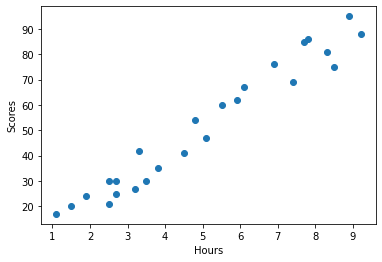

In [41]:
x=df['Hours']
y=df['Scores']
plt.scatter(x,y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Inference
**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [42]:
x=df[['Hours']]
y=df['Scores']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [43]:
from sklearn.model_selection import train_test_split

### Building a model using train-test split 

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 1)
(7, 1)
(18,)
(7,)


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
m1= LinearRegression() 
m1.fit(x,y)

LinearRegression()

In [47]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[83.62284155 26.92318188 26.92318188 69.9367168  60.16091341 28.87834256
 34.74382459]


### Evaluating the model

In [48]:
# Model score - R2_Score
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.9512775177177318
Testing Score 0.9568007519390653


In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [50]:
mae = mean_absolute_error(y_test,ypred_m1)
mse = mean_squared_error(y_test,ypred_m1)
rmse = np.sqrt(mean_squared_error(y_test,ypred_m1))
r2s = r2_score(y_test,ypred_m1)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2_score',r2s)
print('Model_Score',m1.score(x_test,y_test))

MAE 4.37996132880153
MSE 22.75277946850206
RMSE 4.769987365654343
R2_score 0.9568007519390653
Model_Score 0.9568007519390653


### Tabulating the result

In [51]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "R2 Score",'RMSE'])
models

,Model,MAE,MSE,R2 Score,RMSE


In [52]:
new_row = {"Model": "LinearReg M1 (split model)","MAE": mae, "MSE": mse, "R2 Score": r2s, "RMSE": rmse}
models = models.append(new_row,ignore_index=True)
models

,Model,MAE,MSE,R2 Score,RMSE
0,LinearReg M1 (split model),4.379961,22.752779,0.956801,4.769987


### Building a model using the entire dataset

In [53]:
x1=df[['Hours']]
y1=df['Scores']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [54]:
m1= LinearRegression() 
m1.fit(x1,y1)

LinearRegression()

### Making Predictions

In [55]:
ypred=m1.predict(x1)
print(ypred)

[26.92318188 52.3402707  33.76624426 85.57800223 36.69898527 17.14737849
 92.4210646  56.25059205 83.62284155 28.87834256 77.75735951 60.16091341
 46.47478866 34.74382459 13.23705714 89.48832358 26.92318188 21.05769985
 62.11607409 74.8246185  28.87834256 49.40752968 39.63172629 69.9367168
 78.73493985]


In [56]:
df['ypred']=ypred
df.head()

,Hours,Scores,ypred
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


In [57]:
# Y_pred=mx+c
m=m1.coef_
c=m1.intercept_
print('Coefficient or Slope:',m)
print('Intercept or Constant:',c)

Coefficient or Slope: [9.77580339]
Intercept or Constant: 2.483673405373196


In [58]:
# Y_pred=mx+c
df['y_pred_eqn']=m*df['Hours']+c
df.head()

,Hours,Scores,ypred,y_pred_eqn
0,2.5,21,26.923182,26.923182
1,5.1,47,52.340271,52.340271
2,3.2,27,33.766244,33.766244
3,8.5,75,85.578002,85.578002
4,3.5,30,36.698985,36.698985


### Plotting the data with regression line:

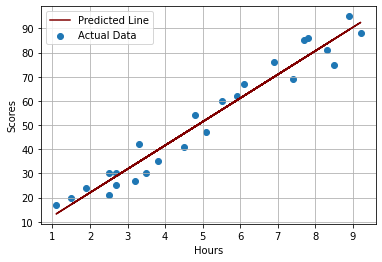

In [59]:
plt.scatter(df['Hours'],df['Scores'],label='Actual Data')
plt.plot(df['Hours'],df['ypred'],label='Predicted Line',color='maroon')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid()
plt.show()

### Evaluating the Model:

In [60]:
# R2_Score
print('r2 Score/Model Score:',m1.score(x1,y1))

r2 Score/Model Score: 0.9529481969048356


In [61]:
mse=mean_squared_error(y1,ypred)
mae=mean_absolute_error(y1,ypred)
rmse=np.sqrt(mean_squared_error(y1,ypred))
r2s=r2_score(y1,ypred)
print('mse',mse)
print('mae',mae)
print('rmse',rmse)
print('r2_score',r2s)
print('Model_Score',m1.score(x1,y1))

mse 28.88273050924546
mae 4.972805319866375
rmse 5.374265578592619
r2_score 0.9529481969048356
Model_Score 0.9529481969048356


### Tabulating the result:

In [62]:
new_row = {"Model": "LinearReg M2 (entire model)","MAE": mae, "MSE": mse, "R2 Score": r2s, "RMSE": rmse}
models = models.append(new_row,ignore_index=True)
models

,Model,MAE,MSE,R2 Score,RMSE
0,LinearReg M1 (split model),4.379961,22.752779,0.956801,4.769987
1,LinearReg M2 (entire model),4.972805,28.882731,0.952948,5.374266


### Inference
- Models are performing really well with R2 Scores 0.95

### Plotting graph to see difference between the actual and predicted values:

In [63]:
Results = pd.DataFrame({'Actual': df['Scores'], 'Predicted': df['ypred']}) 
Results 

,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985
5,20,17.147378
6,88,92.421065
7,60,56.250592
8,81,83.622842
9,25,28.878343


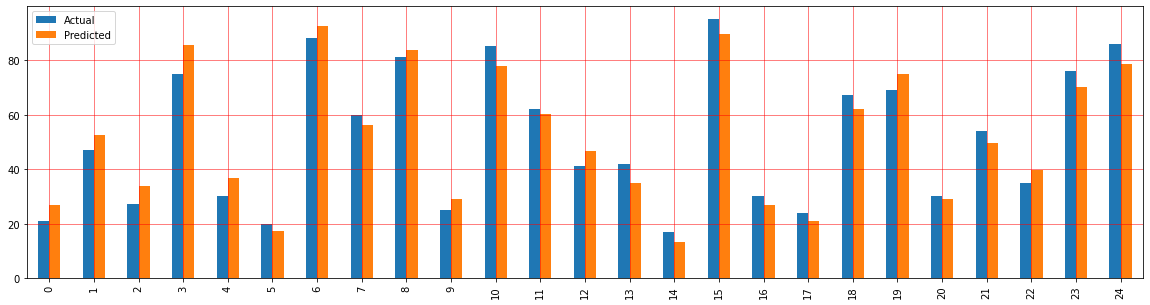

In [64]:
Results.plot(kind='bar',figsize=(20,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

### Predicting Score if student studies 9.25 hours a day:

In [65]:
ypred_a_m1=m1.predict([[9.25]]) 
print(ypred_a_m1)
ypred_a_m2=m*9.25+c
print(ypred_a_m2)

[92.90985477]
[92.90985477]


<b> - Thus, if a student studies around 9.25 hours a day his/her predicted scores should be about 92.90985477